In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn


from google.colab import drive
drive.mount('/content/gdrive')

# Define the data directory on Google Drive
data_dir = '/content/gdrive/MyDrive/new (1)/Kazakhstan_Banknotes_Dataset (1)/out_dir/'

# Define the classes
classes = ["500_tenge", "1000_tenge", "2000_tenge", "5000_tenge", "10000_tenge", "20000_tenge"]

# Define the transformation for image data (you can customize this)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a common size
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])

# Create datasets for training and validation
train_dataset = datasets.ImageFolder(
    root=data_dir,
    transform=transform
)

# Split the dataset into training and validation
# Adjust the split ratio as needed
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create data loaders for training and validation
batch_size = 32  # Adjust the batch size as needed
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Verify the number of classes and class labels
# num_classes = len(train_dataset.classes)
# class_labels = train_dataset.classes

# print(f"Number of classes: {num_classes}")
# print(f"Class labels: {class_labels}")


Mounted at /content/gdrive


In [ ]:
AlexNet_model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)

#Model description
AlexNet_model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.6.0" to /root/.cache/torch/hub/v0.6.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 146MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
#Updating the second classifier
AlexNet_model.classifier[4] = nn.Linear(4096,1024)

#Updating the third and the last classifier that is the output layer of the network. Make sure to have 10 output nodes if we are going to get 10 class labels through our model.
AlexNet_model.classifier[6] = nn.Linear(1024,10)

In [ ]:
#Loss
criterion = nn.CrossEntropyLoss()

#Optimizer(SGD)
optimizer = optim.SGD(AlexNet_model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
#Instantiating CUDA device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#Verifying CUDA
print(device)

#Move the input and AlexNet_model to GPU for speed if available
AlexNet_model.to(device)

cuda:0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
for epoch in range(10):
    # Training
    AlexNet_model.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()
        outputs = AlexNet_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Testing
    AlexNet_model.eval()
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = AlexNet_model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    # Calculate and print loss and accuracy
    avg_train_loss = train_loss / (i + 1)
    train_accuracy = 100 * correct_train / total_train
    avg_test_loss = test_loss / (i + 1)
    test_accuracy = 100 * correct_test / total_test

    print(f"Epoch [{epoch + 1}/{num_epochs}] | "
          f"Train Loss: {avg_train_loss:.4f} | Train Accuracy: {train_accuracy:.2f}% | "
          f"Test Loss: {avg_test_loss:.4f} | Test Accuracy: {test_accuracy:.2f}%")

print('Finished Training of AlexNet')

KeyboardInterrupt: ignored

In [ ]:
#Testing Accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = AlexNet_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

#Testing classification accuracy for individual classes.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in train_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = AlexNet_model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

KeyboardInterrupt: ignored

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.optim import lr_scheduler


from google.colab import drive
drive.mount('/content/gdrive')

# Define the data directory on Google Drive
data_dir = '/content/gdrive/MyDrive/new (1)/Kazakhstan_Banknotes_Dataset (1)/out_dir/'

# Define the classes
classes = ["500_tenge", "1000_tenge", "2000_tenge", "5000_tenge", "10000_tenge", "20000_tenge"]

# Define the transformation for image data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create datasets for training and validation
train_dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Split the dataset into training and validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create data loaders for training and validation
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Load the modified AlexNet model
AlexNet_model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', weights='AlexNet_Weights.DEFAULT')

# Modify the second classifier and the last classifier
AlexNet_model.classifier[4] = nn.Linear(4096, 1024)
AlexNet_model.classifier[6] = nn.Linear(1024, len(classes))

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
AlexNet_model = AlexNet_model.to(device)

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer (SGD with momentum)
optimizer = optim.Adam(AlexNet_model.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.optim import lr_scheduler


from google.colab import drive
drive.mount('/content/gdrive')

# Define the data directory on Google Drive
data_dir = '/content/gdrive/MyDrive/new (1)/Kazakhstan_Banknotes_Dataset (1)/out_dir/'

# Define the classes
classes = ["500_tenge", "1000_tenge", "2000_tenge", "5000_tenge", "10000_tenge", "20000_tenge"]

# Define the transformation for image data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create datasets for training and validation
train_dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Split the dataset into training and validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create data loaders for training and validation
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Load the modified AlexNet model
AlexNet_model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', weights='AlexNet_Weights.DEFAULT')

# Modify the second classifier and the last classifier
AlexNet_model.classifier[4] = nn.Linear(4096, 1024)
AlexNet_model.classifier[6] = nn.Linear(1024, len(classes))

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
AlexNet_model = AlexNet_model.to(device)

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer (SGD with momentum)
optimizer = optim.SGD(AlexNet_model.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)


# Training loop
num_epochs = 10
# Collect training and validation accuracy values
train_accuracy_values = []
val_accuracy_values = []

for epoch in range(num_epochs):
    AlexNet_model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = AlexNet_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    scheduler.step()  # Update learning rate

    # Validation loop
    AlexNet_model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = AlexNet_model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * correct_val / total_val

    print(f'Epoch [{epoch + 1}/{num_epochs}] | '
          f'Train Loss: {avg_train_loss:.4f} | Train Accuracy: {train_accuracy:.2f}% | '
          f'Validation Loss: {avg_val_loss:.4f} | Validation Accuracy: {val_accuracy:.2f}%')

    train_accuracy_values.append(train_accuracy)
    val_accuracy_values.append(val_accuracy)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


Epoch [1/10] | Train Loss: 1.6105 | Train Accuracy: 37.54% | Validation Loss: 1.0899 | Validation Accuracy: 84.13%
Epoch [2/10] | Train Loss: 0.9102 | Train Accuracy: 74.18% | Validation Loss: 0.4494 | Validation Accuracy: 94.05%
Epoch [3/10] | Train Loss: 0.4458 | Train Accuracy: 88.78% | Validation Loss: 0.2093 | Validation Accuracy: 97.22%
Epoch [4/10] | Train Loss: 0.2850 | Train Accuracy: 92.15% | Validation Loss: 0.1641 | Validation Accuracy: 94.84%
Epoch [5/10] | Train Loss: 0.1961 | Train Accuracy: 94.14% | Validation Loss: 0.1031 | Validation Accuracy: 98.02%
Epoch [6/10] | Train Loss: 0.1535 | Train Accuracy: 95.93% | Validation Loss: 0.0699 | Validation Accuracy: 98.02%
Epoch [7/10] | Train Loss: 0.1052 | Train Accuracy: 96.82% | Validation Loss: 0.0641 | Validation Accuracy: 97.62%
Epoch [8/10] | Train Loss: 0.0896 | Train Accuracy: 97.62% | Validation Loss: 0.0571 | Validation Accuracy: 98.02%
Epoch [9/10] | Train Loss: 0.1025 | Train Accuracy: 97.12% | Validation Loss: 0.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Initialize lists to store true labels and predicted labels for train and validation sets
true_labels_train = []
predicted_labels_train = []
true_labels_val = []
predicted_labels_val = []

# Set the model to evaluation mode
AlexNet_model.eval()

# For the training set
with torch.no_grad():
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = AlexNet_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels_train.extend(labels.cpu().numpy())
        predicted_labels_train.extend(predicted.cpu().numpy())

# For the validation set
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = AlexNet_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels_val.extend(labels.cpu().numpy())
        predicted_labels_val.extend(predicted.cpu().numpy())

# Calculate and print evaluation metrics for the training set
accuracy_train = accuracy_score(true_labels_train, predicted_labels_train)
precision_train = precision_score(true_labels_train, predicted_labels_train, average='micro')
recall_train = recall_score(true_labels_train, predicted_labels_train, average='micro')
f1_train = f1_score(true_labels_train, predicted_labels_train, average='micro')

print('Metrics for the Training Set:')
print(f'Accuracy: {accuracy_train:.2f}')
print(f'Precision: {precision_train:.2f}')
print(f'Recall: {recall_train:.2f}')
print(f'F1 Score: {f1_train:.2f}')

# Calculate and print evaluation metrics for the validation set
accuracy_val = accuracy_score(true_labels_val, predicted_labels_val)
precision_val = precision_score(true_labels_val, predicted_labels_val, average='micro')
recall_val = recall_score(true_labels_val, predicted_labels_val, average='micro')
f1_val = f1_score(true_labels_val, predicted_labels_val, average='micro')

print('Metrics for the Validation Set:')
print(f'Accuracy: {accuracy_val:.2f}')
print(f'Precision: {precision_val:.2f}')
print(f'Recall: {recall_val:.2f}')
print(f'F1 Score: {f1_val:.2f}')


Metrics for the Training Set:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Metrics for the Validation Set:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


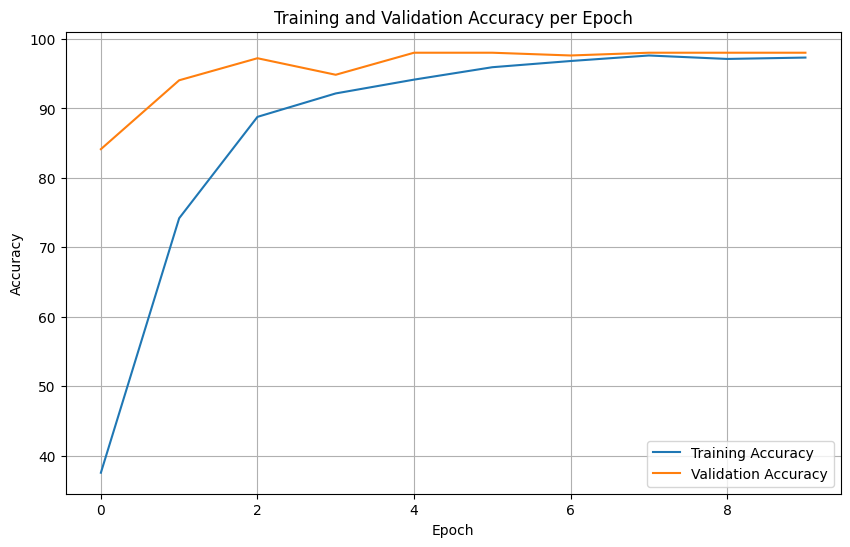

In [ ]:
import matplotlib.pyplot as plt
# Plot the training accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy_values, label='Training Accuracy')
plt.plot(val_accuracy_values, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.grid(True)
plt.legend()
plt.show()

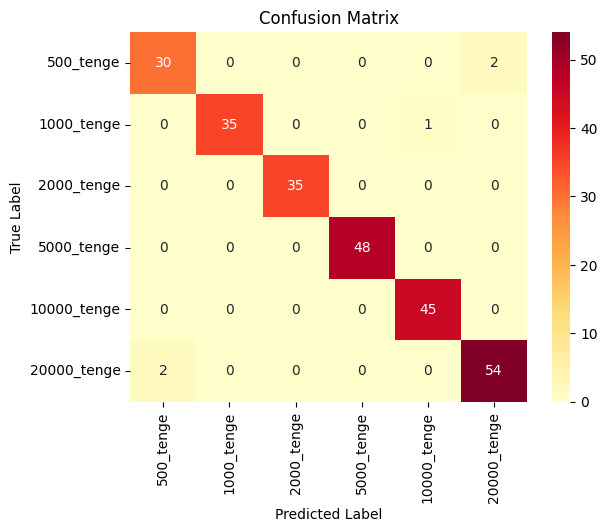

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a function to calculate and plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    """
    Plot the confusion matrix as a heatmap with a custom color palette.

    Args:
        cm (numpy.ndarray): The confusion matrix.
        classes (list): The list of class labels.
    """
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes,
                cmap="YlOrRd", cbar=True)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix

# Get the predicted and true labels
y_pred = []
y_true = []

for inputs, labels in val_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = AlexNet_model(inputs)
    _, predicted = torch.max(outputs, 1)
    y_pred.append(predicted.cpu().detach().numpy())
    y_true.append(labels.cpu().detach().numpy())
y_pred = np.concatenate(y_pred)
y_true = np.concatenate(y_true)

cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plot_confusion_matrix(cm, classes)
